In [1]:
from mpl_toolkits import mplot3d

import numpy as np

import matplotlib.pyplot as plt

import matplotlib

plt.rcParams["font.size"] = 15
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.lines import Line2D

In [2]:
import dask.dataframe as dd

/Users/glynatsi/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:366: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/glynatsi/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:366: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/glynatsi/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:366: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [3]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.lines import Line2D

In [4]:
import pandas as pd

from collections import Counter

import itertools

In [5]:
import sympy as sym

In [6]:
import os

In [7]:
os.chdir("/Users/glynatsi/rsc/reactive-two-bits/")

In [8]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader("main", "src/main.py").load_module()

from main import *

In [9]:
eq = SourceFileLoader("eq", "src/numerical_equilibria_n_bit_vs_n_bit.py").load_module()

from eq import *

In [ ]:
def seperate_equilibria_and_non(df):
    per_player = df.groupby('ID')['condition A'].all()

    eq_players_ID = per_player[per_player == True].index

    noneq_players_ID = per_player[per_player == False].index
    
    return df[df['ID'].isin(eq_players_ID)], df[df['ID'].isin(noneq_players_ID)]

In [10]:
colors = ["tab:green", "tab:purple"]

### Numerical Nash

In [11]:
eq = pd.read_csv("data/equilibria_from_large_search.csv")

In [139]:
eq_high_benefit = pd.read_csv("data/equilibria_with_high_benefit.csv")

In [12]:
def N0(p):
    return 2 * p[3] - 1

def N13107(p):
    return p[1] + p[2] -  3 / 2

In [126]:
def N0_high_benefit(p):
    return 7 * p[3] - 6

def N13107_high_benefit(p):
    return (7 * p[1] + 7 * p[2] -  13) / 2

In [135]:
x = np.arange(0, 1, 0.03)

y1 = np.arange(0.47, 1, 0.03)

xx1, yy1 = np.meshgrid(x, y1)

z = (3 / 2)  - yy1

y2 = np.arange(0, 1, 0.03)

xx2, yy2 = np.meshgrid(x, y2)

z2 = xx2 * 0 + yy2 * 0 + 1 / 2


y3 = np.arange(0.85, 1, 0.03)
xx3, yy3 = np.meshgrid(x, y3)

z3 = (13  - 7 * yy3) / 7

z4 = xx2 * 0 + yy2 * 0 + 6 / 7

In [155]:
custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor="#0072B2", markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:green', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor="#D55E00", markersize=10, alpha=.55)]

In [ ]:
"#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"

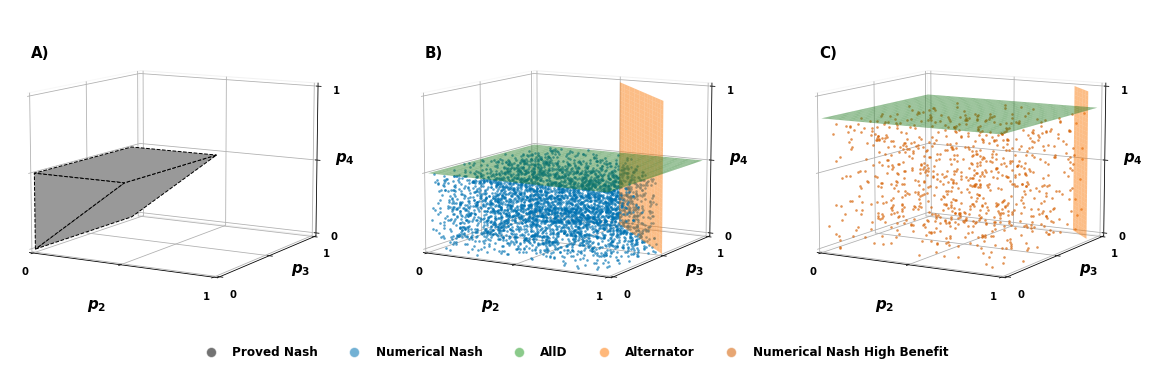

In [157]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')

ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
    
v = np.array([[0, 0, 0], [0, .9, 0], [0.51, 0.9, 0.5],  [0.51, 0, .5], [0, 0, .5], [0, 0.9, .5]])

verts = [[v[0], v[1], v[2], v[3]],
         [v[2], v[3], v[4], v[5]],
         [v[0], v[4], v[3]]]
            
ax1.add_collection3d(Poly3DCollection(verts, facecolors="#999999",
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='black',))

ax2.plot_surface(xx2, yy2, z2, alpha=0.5, color="tab:green")
ax3.plot_surface(xx2, yy2, z4, alpha=0.5, color="tab:green")
ax2.plot_surface(z, yy1, xx1, alpha=0.5, color='tab:orange')
ax3.plot_surface(z3, yy3, xx3, alpha=0.5, color='tab:orange')


for i, row in eq[['p2', 'p5', 'p6']].round(2).iterrows():

        ax2.scatter(row['p2'], row['p5'], row['p6'], color="#0072B2", s=3, alpha=0.5)
        
for i, row in eq_high_benefit[['p2', 'p5', 'p6']].round(2).iterrows():

        ax3.scatter(row['p2'], row['p5'], row['p6'], color="#D55E00", s=3, alpha=0.5)

# ax2.plot((0.5, 0, 0, 1),
#          (0.99, .99, 0, 0),
#          (0.5, 0.5, 0.5, 0.5), linestyle='--', linewidth=1, color='black')

# ax2.plot((1, 1, 1, 0, 0, .5, 0.5),
#          (0.5, 0.5, 0, 0, 1, 1, 1),
#          (0.55, 0, 0, 0, 0, 0, 0.5), linestyle='--', linewidth=1, color='black')

# ax2.plot((0, 0),
#          (0, 0),
#          (0.5, 0), linestyle='--', linewidth=1, color='black')

# ax2.plot((0, 0),
#          (1, 1),
#          (0.5, 0), linestyle='--', linewidth=1, color='black')

# ax2.plot((1, 1),
#          (0, 0),
#          (0.5, 0), linestyle='--', linewidth=1, color='black')

# ax2.plot((1, 1),
#          (0, 0.5),
#          (0.5, .5), linestyle='--', linewidth=1, color='black')

for ax in axes:
    ax.view_init(10, -60)
    
    ax.set_xlim(0, 1);
    ax.set_ylim(0, 1);
    ax.set_zlim(0, 1);
    
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
    
ax1.set_title("A)", fontweight='bold', x=.1, y=.9, fontsize=15)
ax2.set_title("B)", fontweight='bold', x=.1, y=.9, fontsize=15)
ax3.set_title("C)", fontweight='bold', x=.1, y=.9, fontsize=15)
    
ax3.legend(custom_lines, ['Proved Nash',
                          'Numerical Nash',
                          'AllD', 'Alternator', 
                          'Numerical Nash High Benefit'], bbox_to_anchor=(.5, 0), 
           ncol=5, framealpha=0, fontsize=12);

plt.savefig("static/two_bit_reactive_numerical_results.pdf", bbox_inches='tight')

### Results on Good Nash - Two bit reactive

In [27]:
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:blue', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:green', markersize=10, alpha=.55)]

In [28]:
color = '#FDF6E3'

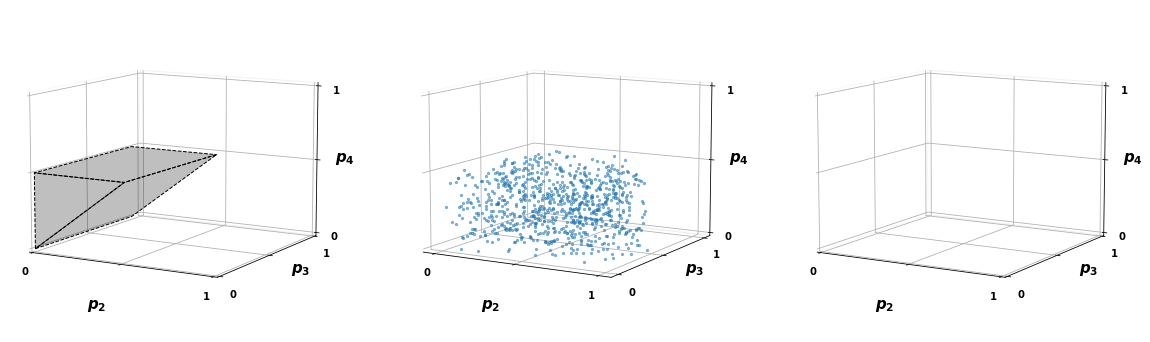

In [35]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
    
v = np.array([[0, 0, 0], [0, .9, 0], [0.51, 0.9, 0.5],  [0.51, 0, .5], [0, 0, .5], [0, 0.9, .5]])

verts = [[v[0], v[1], v[2], v[3]],
         [v[2], v[3], v[4], v[5]],
         [v[0], v[4], v[3]]]
            
ax1.add_collection3d(Poly3DCollection(verts, facecolors='black',
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='black', alpha=.25))

for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5, s=5)

ax2.set_zlim(0, 1);

    
# for k, indices in enumerate([[Is0, Js0, Zs0], 
#                              [Is13107, Js13107, Zs13107]]):
    
#         Is, Js, Zs = indices
        
#         for i, j, z in zip(Is, Js, Zs):
            
#             ax3.scatter(xv[i, j, z],
#                             yv[i, j, z],
#                             zv[i, j, z],
#                             s=1,
#                             color=colors[k])
            
#         ax3.scatter(xv[i, j, z],
#                 yv[i, j, z],
#                 zv[i, j, z],
#                 s=1,
#                 color=colors[k])
        
for ax in axes:
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

# ax1.set_title("A)", fontweight='bold', x=.1, y=.9, fontsize=15)
# ax2.set_title("B)", fontweight='bold', x=.1, y=.9, fontsize=15)
# ax3.set_title("C)", fontweight='bold', x=.1, y=.9, fontsize=15)
    
# ax3.legend(custom_lines, ['Proved Nash',
#                           'Numerical Nash',
#                           'AllD', 'Alternator'], bbox_to_anchor=(0, 0), ncol=4, framealpha=0, fontsize=12);


# plt.savefig("static/two_bit_reactive_numerical_results.pdf", bbox_inches='tight')

In [238]:
files = glob.glob("data/two_bit_against_memory_two/*.csv")

In [239]:
columns2 = (
    ["", "ID"]
    + [f"p{i+1}" for i in range(16)]
    + ["label", "Sp", "Sq", "condition A", "condition B", "c", "b"]
)

In [240]:
dfs = [pd.read_csv(file, index_col=0, names=columns2) for file in files]

In [241]:
df2 = pd.concat(dfs)

In [242]:
df2['ID'].nunique()

1000

In [243]:
eq_memone, noneq_memone = seperate_equilibria_and_non(df2)

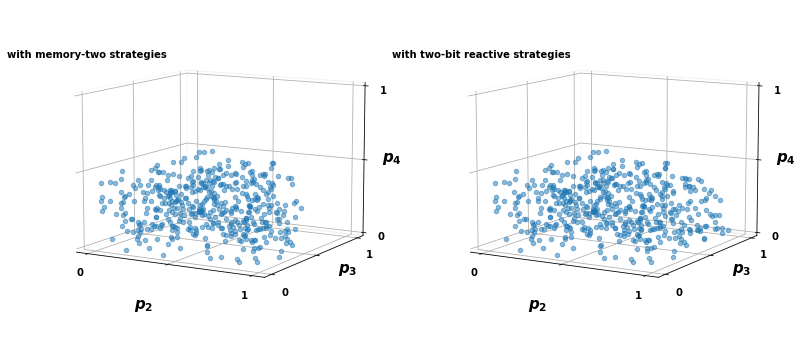

In [248]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
# ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2]

for i, row in eq_memone[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax1.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax1.set_zlim(0, 1);
        
    
for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax2.set_zlim(0, 1);
        
for ax in axes:

#     ax.view_init(10, -70)
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

ax1.set_title("with memory-two strategies", fontweight='bold', x=.1, y=.9, fontsize=10)

ax2.set_title("with two-bit reactive strategies", fontweight='bold', x=.1, y=.9, fontsize=10)


plt.savefig("/Users/glynatsi/src/talks/talks/2022-07-26-ISDGA/static/five.png", 
            transparent=True,  bbox_inches='tight', dpi=300)

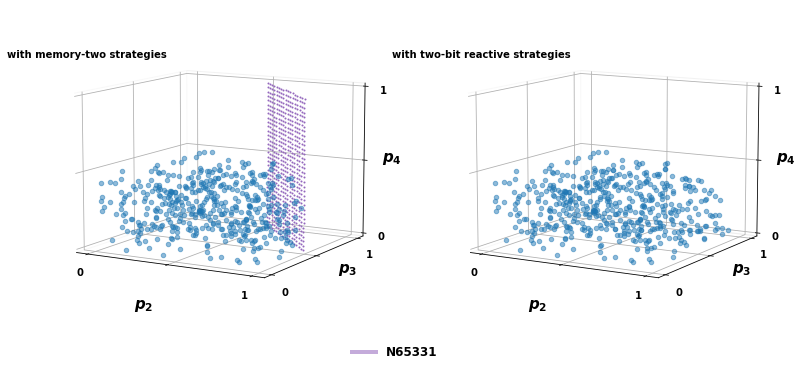

In [258]:
custom_lines = [Line2D([0], [0], color='tab:purple', lw=4, alpha=.55)]

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
# ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2]

for i, row in eq_memone[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax1.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax1.set_zlim(0, 1);
        
    
for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax2.set_zlim(0, 1);
        
for ax in axes:

#     ax.view_init(10, -70)
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

ax1.set_title("with memory-two strategies", fontweight='bold', x=.1, y=.9, fontsize=10)

ax2.set_title("with two-bit reactive strategies", fontweight='bold', x=.1, y=.9, fontsize=10)


for point in data:
     ax1.scatter(point[0],
                 point[1],
                 point[2],
                 s=1,
                 color='tab:purple')
        
    
ax2.legend(custom_lines, ['N65331'], bbox_to_anchor=(0, 0), ncol=4, framealpha=0, fontsize=12);


plt.savefig("/Users/glynatsi/src/talks/talks/2022-07-26-ISDGA/static/six.png", 
            transparent=True,  bbox_inches='tight', dpi=300)

### With different values of $b$

In [29]:
files = glob.glob("data/two_bit_against_memory_two_b_7/*csv")

In [31]:
dfs = [pd.read_csv(file, index_col=0, names=columns) for file in files]

df2 = pd.concat(dfs)

In [32]:
eq2, noneq2 = seperate_equilibria_and_non(df2)

In [34]:
eq2['ID'].nunique()

858

In [89]:
(exprN0).subs({b: 7, c:1})

7*p_4 - 6

In [90]:
(exprN13107).subs({b: 7, c:1}).factor()

(7*p_2 + 7*p_3 - 13)/2

In [64]:
groups = noneq2[noneq2['condition A'] == False].groupby('ID')

sets, ids = [], []

for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [67]:
[s for s in sets if ('N0' not in s) and ('N13107' not in s)]

[]

In [91]:
def N0(p):
    return 7 * p[3] - 6

def N13107(p):
    return (7 * p[1] + 7 * p[2] -  13) / 2

In [92]:
for i, row in eq2[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    A = np.isclose(N13107(p), 0, atol=10 ** -4) or  N13107(p) < 0
    B = np.isclose(N0(p), 0, atol=10 ** -4) or  N0(p) < 0    
    
    assert A and B

In [93]:
ever_true = []

for i, row in noneq2[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    A = np.isclose(N13107(p), 0, atol=10 ** -4) or  N13107(p) < 0
    B = np.isclose(N0(p), 0, atol=10 ** -4) or  N0(p) < 0    
    
    if (A and B):
        ever_true.append(row)

In [165]:
x = np.arange(0, 1 - 10 ** -5, 0.03)
y = np.arange(0, 1 - 10 ** -5, 0.03)
z = np.arange(0, 1 - 10 ** -5, 0.03)

xv, yv, zv = np.meshgrid(x, y, z)

Is0, Js0, Zs0 = np.where(np.isclose(N0((1, xv, yv, zv)), 0, atol=10 ** - 1))
Is13107, Js13107, Zs13107 = np.where(np.isclose(N13107((1, xv, yv, zv)), 0, atol=10 ** - 2))

In [166]:
custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:red', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:green', markersize=10, alpha=.55)]

In [167]:
colors = ['tab:orange', 'tab:green']

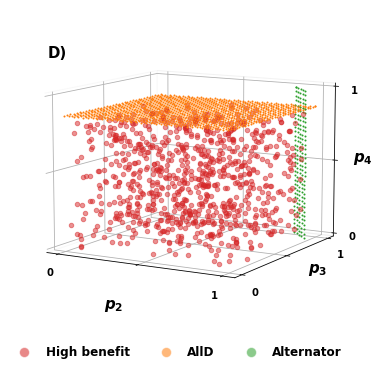

In [178]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')

axes = [ax1]
    
for i, row in eq2[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax1.scatter(row['p2'], row['p5'], row['p6'], color='tab:red', alpha=0.5)

ax1.set_zlim(0, 1);

    
for k, indices in enumerate([[Is0, Js0, Zs0],
                             [Is13107, Js13107, Zs13107]]):
    
        Is, Js, Zs = indices
        
        for i, j, z in zip(Is, Js, Zs):
            
            ax1.scatter(xv[i, j, z],
                            yv[i, j, z],
                            zv[i, j, z],
                            s=1,
                            color=colors[k])
            
        ax1.scatter(xv[i, j, z],
                yv[i, j, z],
                zv[i, j, z],
                s=1,
                color=colors[k])
        
for ax in axes:
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

ax1.set_title("D)", fontweight='bold', x=.1, y=.9, fontsize=15)
# ax2.set_title("B)", fontweight='bold', x=.1, y=.9, fontsize=15)
# ax3.set_title("C)", fontweight='bold', x=.1, y=.9, fontsize=15)
    
ax1.legend(custom_lines, ['High benefit',
                          'AllD', 'Alternator'], bbox_to_anchor=(1, 0), ncol=4, framealpha=0, fontsize=12);


plt.savefig("static/two_bit_reactive_numerical_results_benefit_high.pdf", bbox_inches='tight')